In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
Data ='Import-ekspor-banten.csv'
df =  pd.read_csv(Data,decimal=',')

In [35]:
df.head()

,Time,Nilai_Eksport,Nilai_Import,Volume_Import,Volume_Eksport,Neraca
0,2008-01,571.00,524.74,984.38,357.35,46.26
1,2008-02,553.56,605.54,1196.21,326.98,-51.98
2,2008-03,562.04,537.98,701.13,318.18,24.06
3,2008-04,596.84,632.99,1162.41,320.92,-36.15
4,2008-05,606.80,622.27,855.35,295.14,-15.47


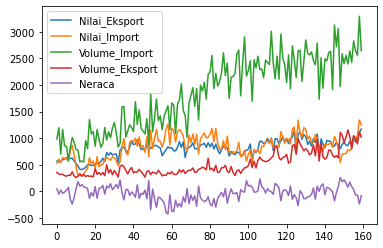

In [29]:
df.plot()
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [34]:
# prepare data
X = df.values
train, test = X[0:-24], X[-24:]
persistence_values = range(1, 25)
scores = list()
for p in persistence_values:
	# walk-forward validation
	history = [x for x in train]
	predictions = list()
	for i in range(len(test)):
		# make prediction
		yhat = history[-p]
		predictions.append(yhat)
		# observation
		history.append(test[i])
	# report performance
	rmse = sqrt(mean_squared_error(test, predictions))
	scores.append(rmse)
	print('p=%d RMSE:%.3f' % (p, rmse))
# plot scores over persistence values
pyplot.plot(persistence_values, scores)
pyplot.show()

ValueError: could not convert string to float: '2019-05'

In [13]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

IndexError: index 160 is out of bounds for axis 0 with size 160

In [28]:
df.describe(include='all')

,Time,Nilai_Eksport,Nilai_Import,Volume_Import,Volume_Eksport,Neraca
count,160,160.000000,160.000000,160.000000,160.000000,160.000000
unique,160,NaN,NaN,NaN,NaN,NaN
top,2008-10,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,803.455125,840.643187,1833.772125,509.792562,-37.188063
std,NaN,159.626166,222.182277,681.704659,223.024441,137.968179
min,NaN,410.750000,284.240000,550.690000,260.060000,-423.410000
25%,NaN,716.727500,697.027500,1173.562500,344.960000,-129.110000
50%,NaN,827.840000,850.000000,1927.730000,414.340000,-24.085000
75%,NaN,909.000000,995.950000,2444.832500,633.032500,64.720000


In [35]:
print(df.dtypes)

Time               object
Nilai_Eksport     float64
Nilai_Import      float64
Volume_Import     float64
Volume_Eksport    float64
Neraca            float64
dtype: object


In [29]:
df[['Nilai_Eksport', 'Volume_Eksport']].corr()

,Nilai_Eksport,Volume_Eksport
Nilai_Eksport,1.000000,0.690366
Volume_Eksport,0.690366,1.000000


In [30]:
df[['Nilai_Import', 'Volume_Import']].corr()

,Nilai_Import,Volume_Import
Nilai_Import,1.000000,0.580285
Volume_Import,0.580285,1.000000


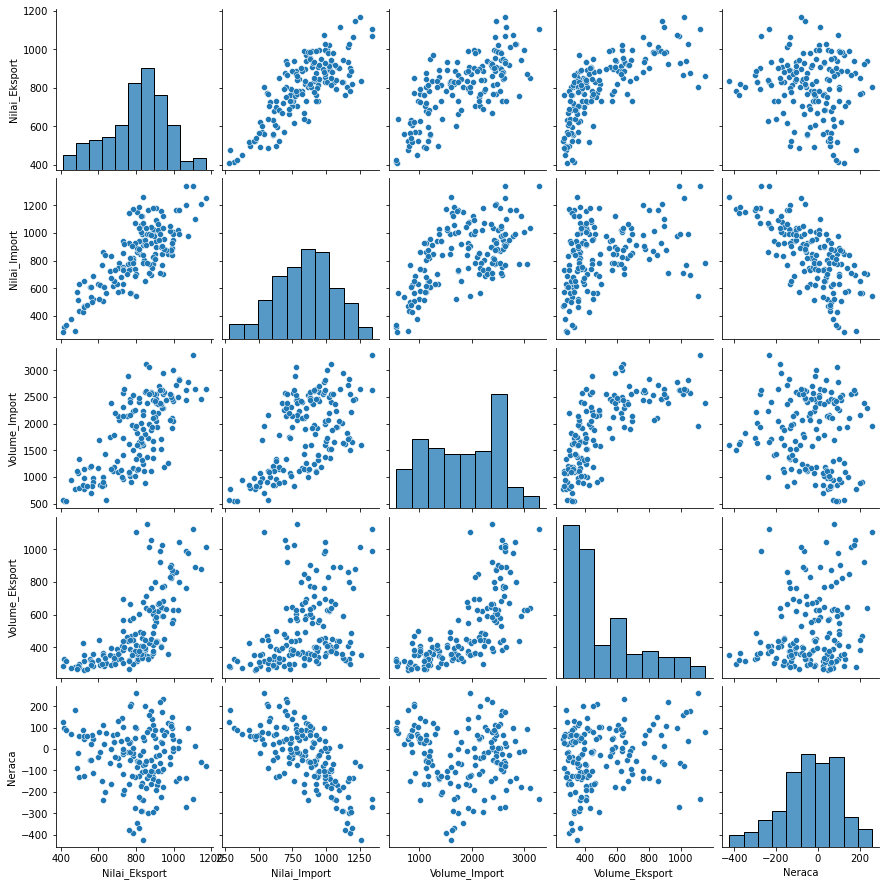

In [32]:
sns.pairplot(data=df,kind='scatter')

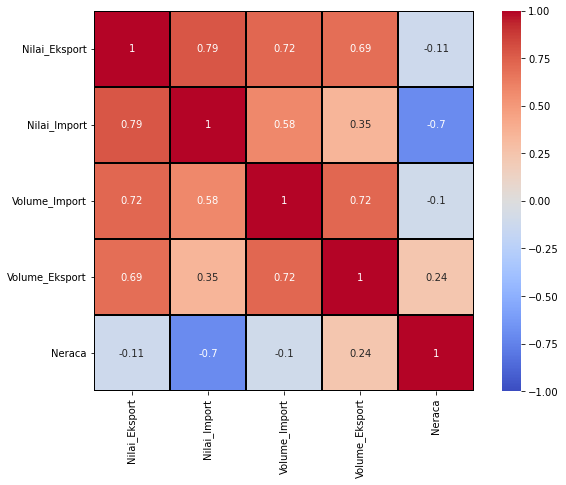

In [33]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

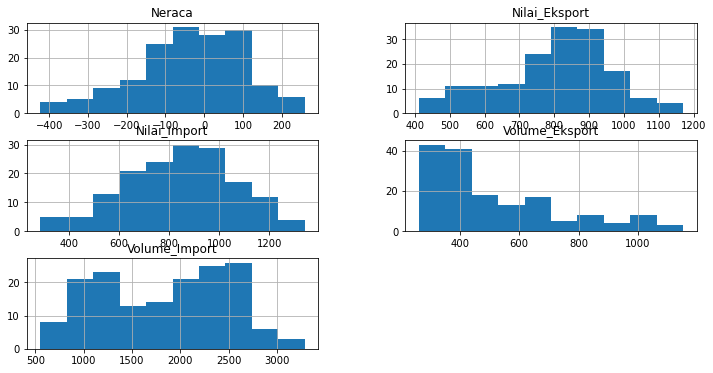

In [34]:
df.hist(linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)